In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# count unique identifications
MAX_Q_VALUE_FOR_COUNTING_RESULTS = 0.01

In [4]:
sequences_df = pd.read_feather('/media/big-ssd/experiments/P3856/sequence-library/sequence-library.feather')

In [5]:
sequences_df.columns

Index(['sequence', 'charge', 'theoretical_mz', 'experiment_scan_mean',
       'experiment_scan_std_dev', 'experiment_scan_peak_width',
       'experiment_rt_mean', 'experiment_rt_std_dev',
       'experiment_rt_peak_width', 'experiment_intensity_mean',
       'experiment_intensity_std_dev', 'number_of_runs_identified', 'q_value'],
      dtype='object')

In [6]:
len(sequences_df[(sequences_df.q_value <= MAX_Q_VALUE_FOR_COUNTING_RESULTS)])

11727

In [7]:
len(sequences_df.drop_duplicates(subset=['sequence', 'charge'], keep='first', inplace=False))

226637

In [8]:
sequences_df.sample(n=10)

,sequence,charge,theoretical_mz,experiment_scan_mean,experiment_scan_std_dev,experiment_scan_peak_width,experiment_rt_mean,experiment_rt_std_dev,experiment_rt_peak_width,experiment_intensity_mean,experiment_intensity_std_dev,number_of_runs_identified,q_value
59114,FNPDNLM[15.9949]HVFHDDLLPLFYTLRQFPGLAHEAR,3,1280.641976,298.000000,0.000000,45.0,1943.909546,0.000000,4.234131,1756.000000,0.000000,1,0.689654
60272,FRGSGDTSNFDDYEEEDIR,2,1126.472326,203.000000,0.000000,30.0,1697.812622,0.000000,8.465088,1343.000000,0.000000,1,0.556489
193084,TCYREKTR,1,1113.546940,163.000000,0.000000,26.0,1969.304199,0.000000,8.469482,1184.000000,0.000000,1,0.699704
215390,VYLEGEFVEWLRRYLENGK,3,800.749710,675.000000,0.000000,68.0,2109.833008,0.000000,6.879639,5448.000000,0.000000,1,0.651259
142130,NPGAGAAPTDSPGLER,2,755.368226,605.000000,0.000000,29.0,1852.214233,0.000000,5.823853,1049.000000,0.000000,1,0.526516
196611,TIIYWDSQTTIEK,2,799.409026,413.000000,0.000000,71.0,1663.142822,0.000000,5.823608,3057.000000,0.000000,1,0.570912
20722,DASPFEAPTTLGSMHHTR,2,977.957426,258.666656,10.780641,40.0,2103.074463,17.172413,6.173340,1737.666667,830.310919,2,0.587140
141167,NM[15.9949]DLPFM[15.9949]L,1,1012.447776,256.000000,0.000000,69.0,2079.925293,0.000000,8.995850,1228.000000,0.000000,1,0.659554
95302,KIATKFWGK,2,539.824026,853.000000,0.000000,13.0,1754.070923,0.000000,18.526978,1849.000000,0.000000,1,0.689131
26837,DLLHVKSVK,2,519.818926,868.000000,0.000000,25.0,1868.226685,0.000000,2.646606,456.000000,0.000000,1,0.743748


In [9]:
sequences_df.experiment_scan_peak_width.max()

1041.48

In [10]:
sequences_df.experiment_rt_peak_width.max()

358.93000000000006

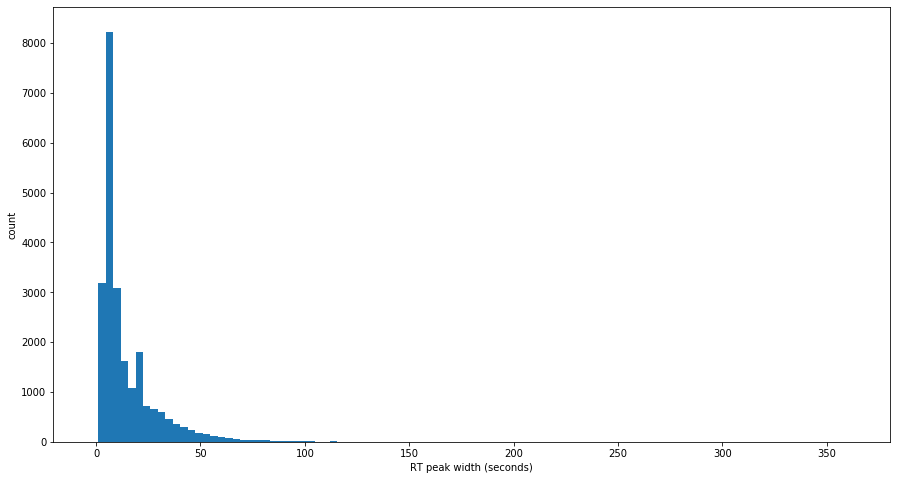

In [13]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
# plt.title('Distribution of RT in {} for features identified as {}, charge {}'.format(selected_group, selected_peptide, selected_peptide_charge))

bins = 100
hist, bins, _ = plt.hist(sequences_df.experiment_rt_peak_width, bins=bins)
plt.xlabel('RT peak width (seconds)')
plt.ylabel('count')

# plt.ylim((0,5500))

# plt.axvline(x=+1, linestyle=':', linewidth=4, color='orange')
# plt.axvline(x=-1, linestyle=':', linewidth=4, color='orange')

plt.show()